<a href="https://colab.research.google.com/github/swapnil-mergal/EDA-Capstone-Project-1-Playstore-app-review-analysis/blob/main/EDA_for_Play_store_app_Review_Analysis_Team(Cloab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
#Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
#Explore and analyze the data to discover key factors responsible for app engagement and success.

#Team Members:
* Muhammed Musthaq T M
* Swapnil Mergal
* Arpit Gour
* Piyush Pandey

##The Google Play Store is one biggest and most important parts of Android. Google Play Store is home to Android apps and games, movies and TV shows, eBooks, and audiobooks. 
##In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.


##Let's take a look at the data, which consists of two files:

1. Play Store Data.csv: It includes all the details of the apps on Play Store.
2. User Reviews.csv: It includes reviews for each app, most helpful first.

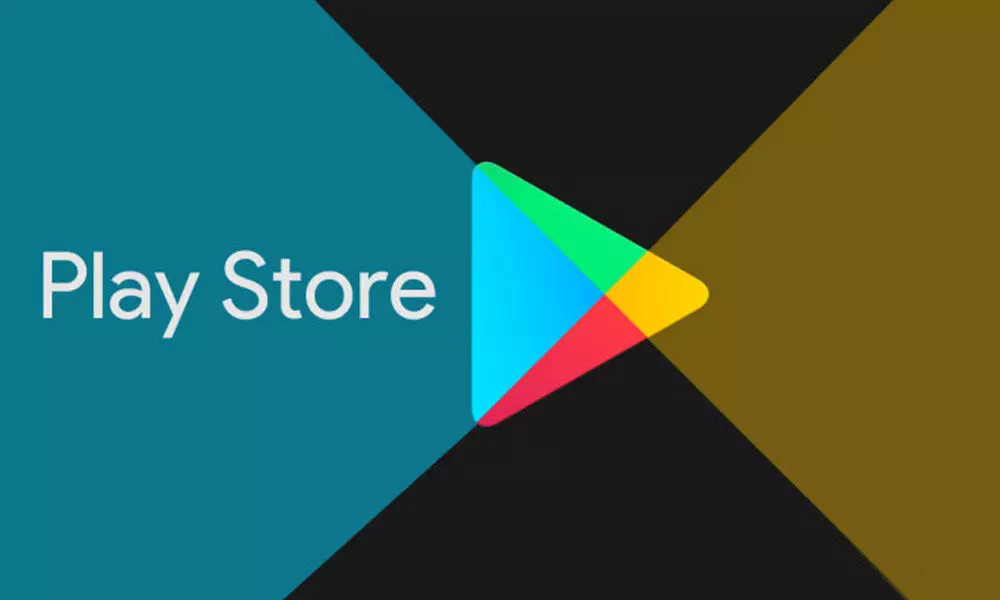

In [ ]:
#importing libraries
from ast import increment_lineno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib import rc
from itertools import count

In [ ]:
#Importing the Data Set.
file_path = '/content/Play Store Data.csv'
file_path2 = '/content/User Reviews.csv'
df1 = pd.read_csv(file_path)
df2 = pd.read_csv(file_path2)

In [ ]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
print(df1.shape, df2.shape)

(10841, 13) (64295, 5)


In [ ]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Data Cleaning

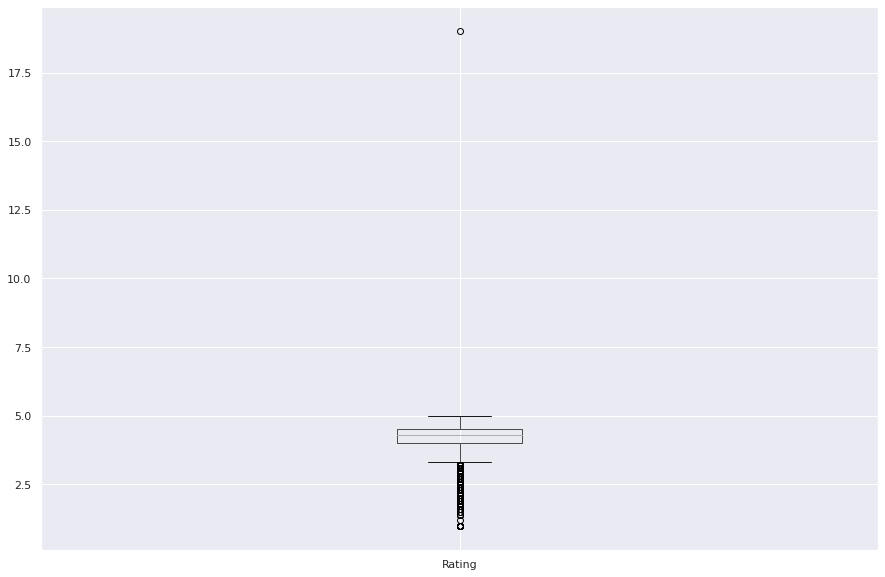

In [ ]:
#ploting a bar graph to see if any outliers are present
df1.boxplot(); 

* We can see an ooutlier at the very top.

#Lets look the data of the outlier and drop it.

In [ ]:
df1[df1.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


* As we know that ratings should not be more that 5, here we can see the rating is 19 which is greater than 5, so lets delete it. 

In [ ]:
df1.drop([10472], inplace = True)

* Lets check the boxplot again to see if the outliers are present or not.

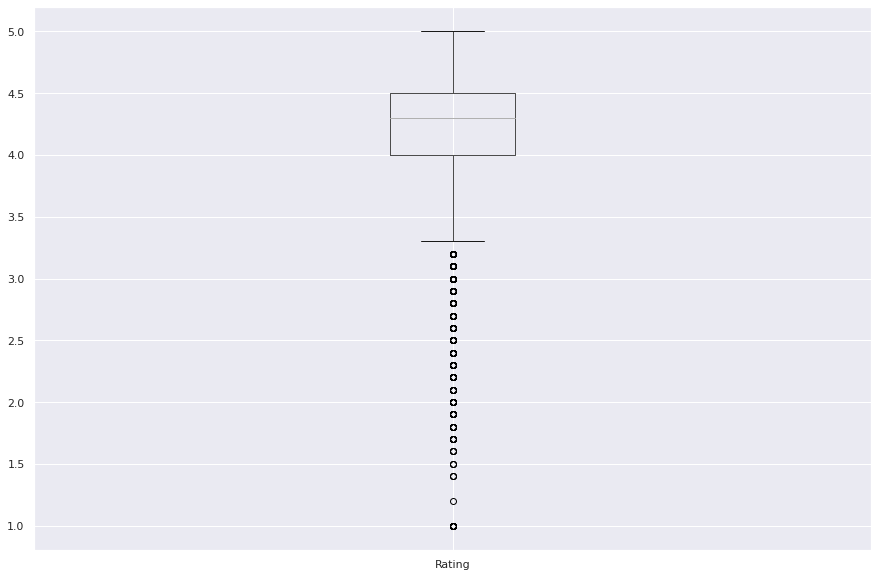

In [ ]:
df1.boxplot(); 

* We have successfully removed the outlier.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb01e7eb50>]],
      dtype=object)

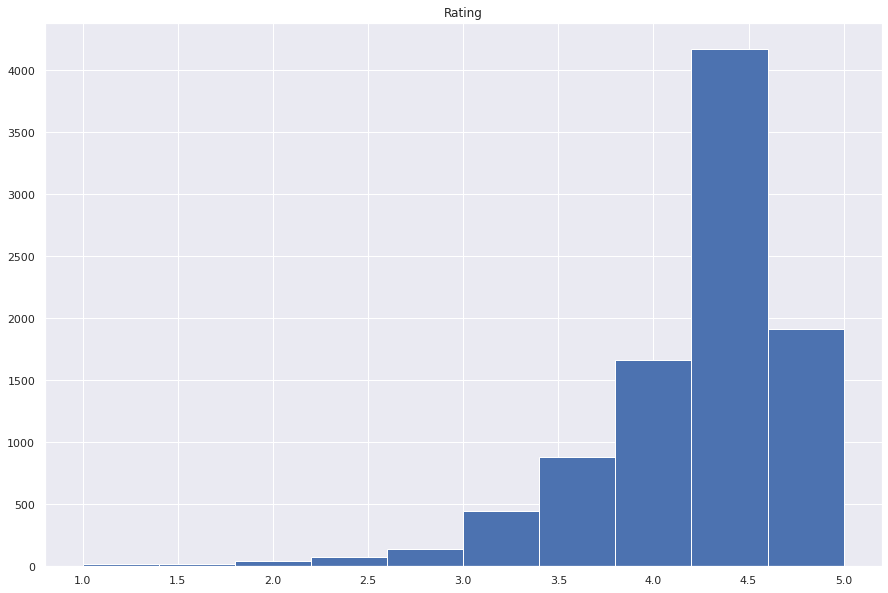

In [ ]:
#Histogram view of the Play Store Dataset
df1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb01e02090>,
      dtype=object)

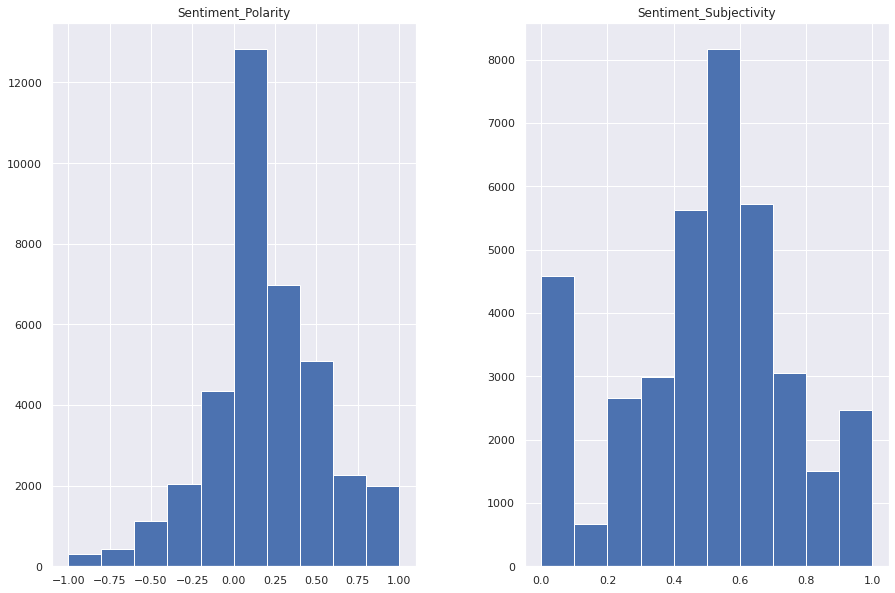

In [ ]:
#Histogram view of User Review Dataset
df2.hist()

## Data correction of Install column

In [ ]:
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
#removing of '+' and ',' present in the Installs.
df1['Installs']= df1['Installs'].map(lambda x : x.rstrip('+'))
df1['Installs']=df1['Installs'].map(lambda x: ''.join(x.split(',')))

In [ ]:
df1['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

* change data type of Installs from object to integer.

In [ ]:
df1['Installs']=df1['Installs'].astype(int)
df1['Installs'].dtype

dtype('int64')

#Correction of Price Data & then change data types to float.

In [ ]:
df1['Price'] = df1['Price'].map(lambda x : x.lstrip('$'))

In [ ]:
df1['Price']= df1['Price'].astype('float')
df1['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

#Changing the DataType of Reviews from Object to Integer

In [ ]:
df1['Reviews']=df1['Reviews'].astype(int)
df1["Reviews"].dtype

dtype('int64')

##Deleting the unwanted Columns.

In [ ]:
## Delete unwanted columns
df1.drop(['Android Ver', 'Current Ver', 'Last Updated'], axis=1, inplace=True)

In [ ]:
# null values from data frame1
print("Total null values contains in each column in data_frame1",df1.isnull().sum(),"\n")

# null values from data frame2
print("Total null values contains in each column in data_frame2",df2.isnull().sum())



Total null values contains in each column in data_frame1 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
dtype: int64 

Total null values contains in each column in data_frame2 App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


#Data visualization

#Category with most of the installation

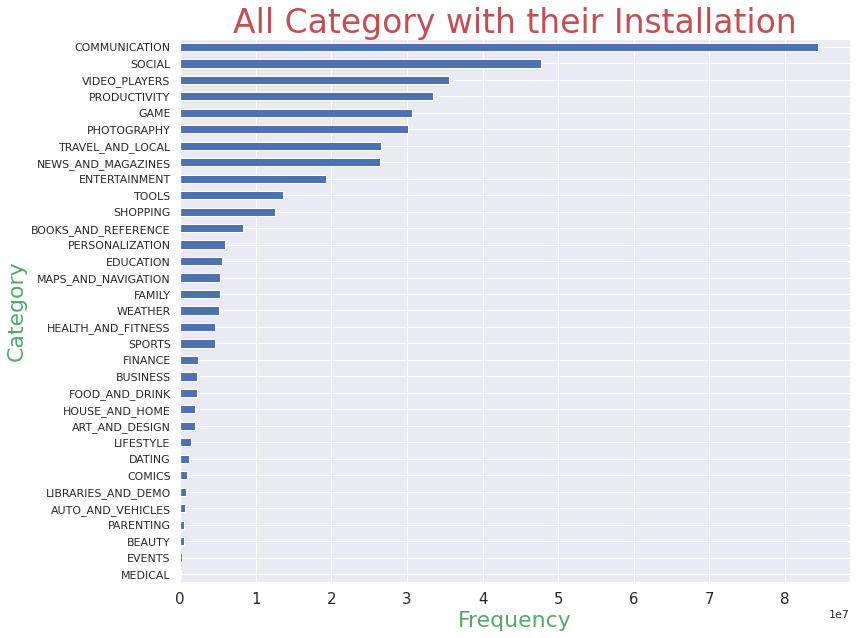

In [ ]:
plt.figure(figsize=(12,10))
df1.groupby('Category')['Installs'].mean().round(0).sort_values(ascending=True).plot(kind="barh")
plt.xticks(size=15)
plt.xlabel("Frequency",size=22,c="g")
plt.ylabel("Category",size=22,c="g")
plt.title("All Category with their Installation",size=33,c="r")
plt.show()



##Observation
* From the above graph we can observe that Communication, Social and Video-Players has more number of installation, However Communication has double the installations of Social and Video-Player.

#Exploratory Data Analysis.

#1.Users Sentiment towards applications

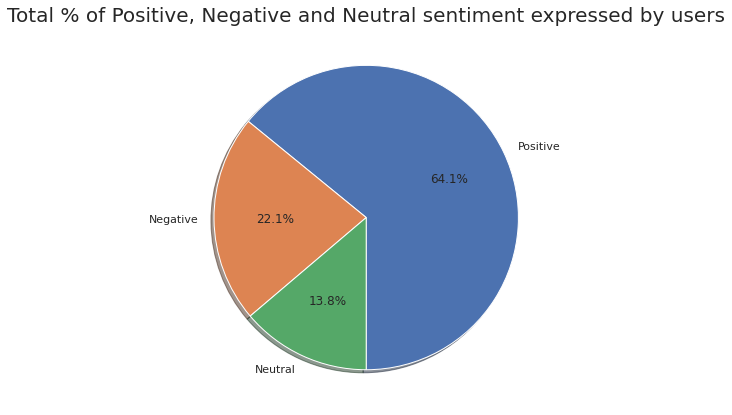

In [ ]:
plt.figure(figsize=(10,7))
labels =df2['Sentiment'].value_counts(sort = True).index
sizes = df2['Sentiment'].value_counts(sort = True)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total % of Positive, Negative and Neutral sentiment expressed by users',size = 20)
plt.show()

##Observation
* From the above pie graph we can observe that about 64% of apps has Positive Sentiment, 22% of aapps has Negative Sentiment and about 14% of apps has the Neutral Sentiment.



# 2.Distribution of App Rating

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


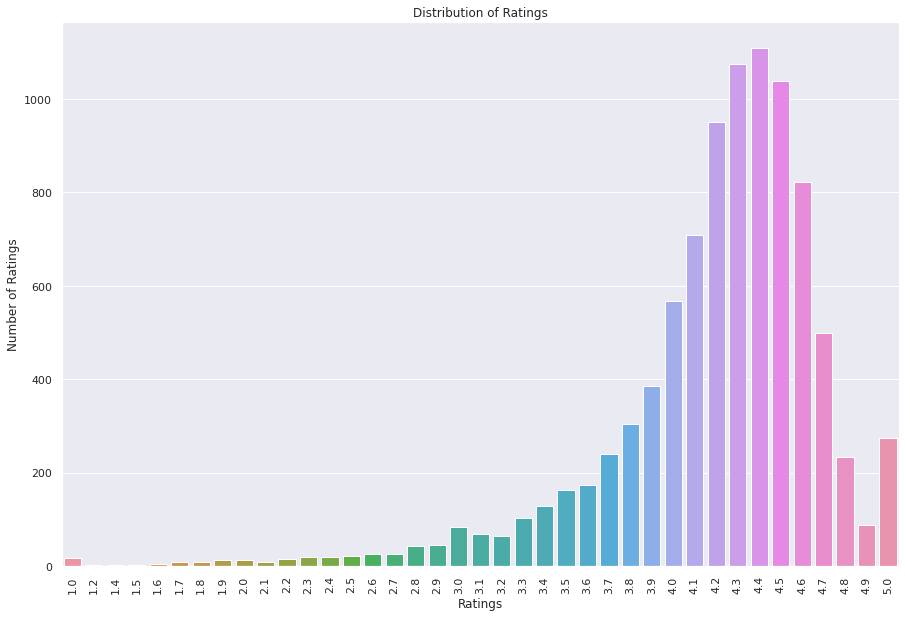

In [ ]:
g = sns.countplot('Rating', data=df1)
sns.set(rc= {'figure.figsize' :(20,8)})
plt.xticks(rotation = 90)
plt.title("Distribution of Ratings")
plt.ylabel('Number of Ratings')
plt.xlabel('Ratings')
plt.show()

##What are the implication of the above analysis?
* Most of the apps are rated between 3.7 to 5
* There are only few apps which are rated less than 3
* Maximun number of the apps are rated between 4.2 and 4.6

# 3.What are the top Content_Rating values?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


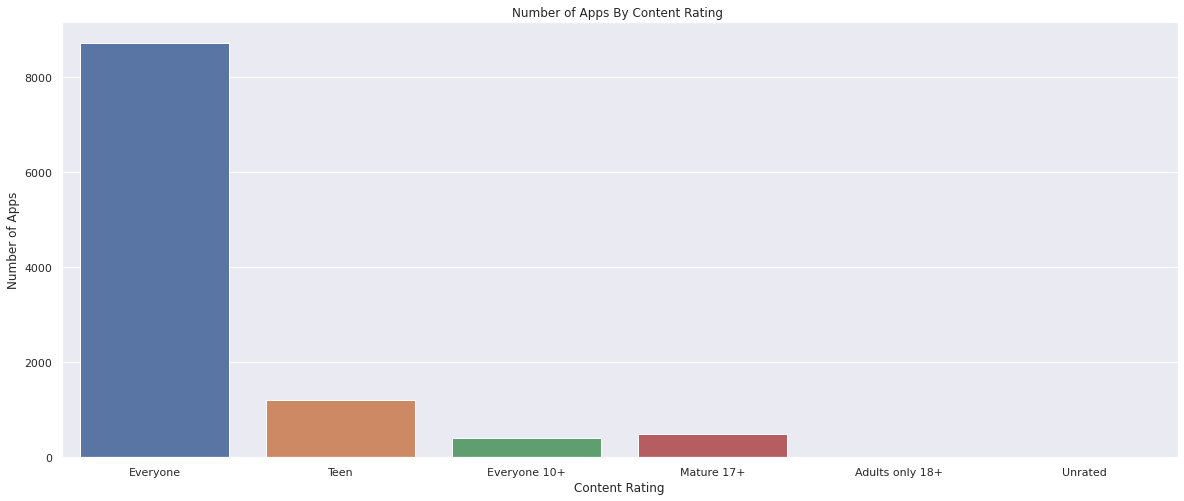

In [ ]:
g = sns.countplot(df1['Content Rating'])
plt.title("Number of Apps By Content Rating ")
sns.set(rc = {'figure.figsize':(15,10)})
plt.ylabel('Number of Apps')
plt.show()

##Observation
* Adults only 18+ and Unrated are with very less munber of apps.
* 'Everyone' has more number of Apps, which means most of the apps are availabla for everyone without any age restriction.

# 4.Categories vs High Reviews

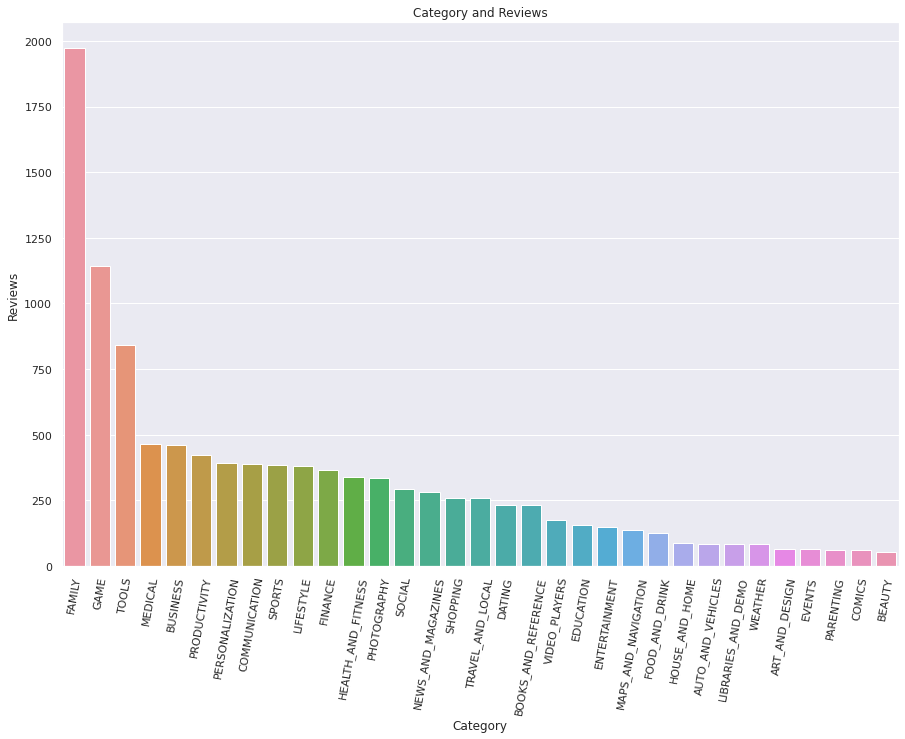

In [ ]:
category_list = list(df1['Category'].unique())
category_review = []
for i in category_list:
    x = df1[df1['Category'] == i]
    if(len(x)!=0):
        review = len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)

#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

##Observation
* From the above graph we can observe that Family, Game and Tools has the higher reviews when compared to other Category.' 

#5.Let us add a rating group column based on (Average, Low, High) from Rating.

In [ ]:
def rating_group(rating):

    try:
        rating = round(rating)
        if int(rating) in range(0,3):
            return 'low'
        elif int(rating) in range(3,5):
            return 'Average'
        elif int(rating) in range(4,6):
            return 'High'
    except ValueError as error:
        return 'none'

    
df1['Rating_Group'] = df1['Rating'].apply(rating_group)

In [ ]:
# To see if the Rating_Group is added or not.
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating_Group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,Average
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,Average
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,Average
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,Average


In [ ]:
df1['Rating_Group'].value_counts()

Average    7299
High       1917
none       1474
low         150
Name: Rating_Group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


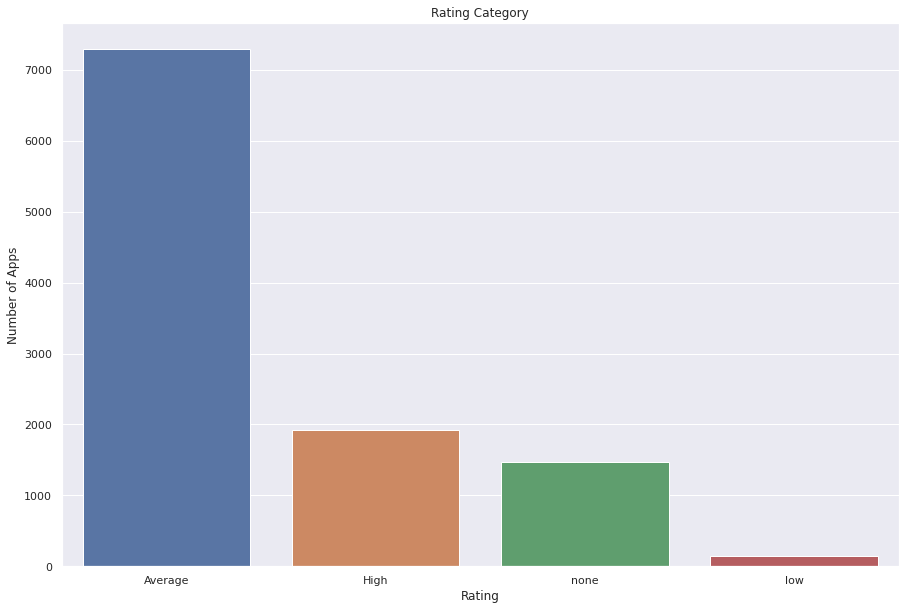

In [ ]:
g = sns.countplot('Rating_Group', data=df1)
sns.set(rc= {'figure.figsize' :(30,6)})
plt.title("Rating Category")
plt.ylabel('Number of Apps')
plt.xlabel('Rating')
plt.show()


##Observation
* We can see from the above output there are 7299 of average rating, 1917 of high rating and 150 of low rating. 

#6.Lets Analyse the Sentiment of user reviews on paid and free applications

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

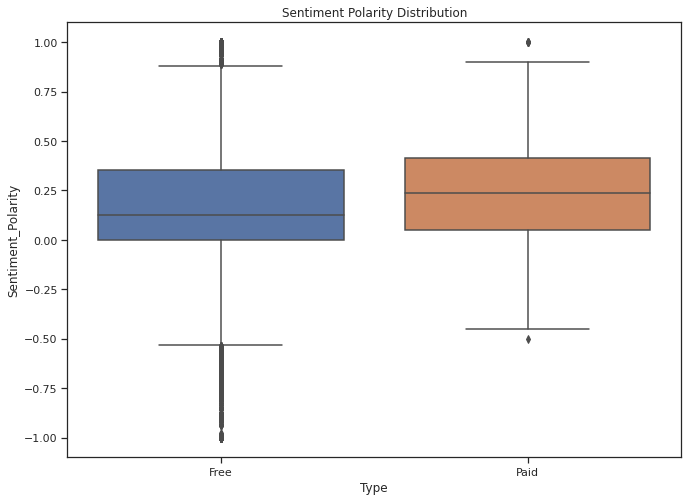

In [ ]:
# Join the two dataframes
merged_df = df2.merge(df1, on='App')

# Drop NA values from Sentiment columns
merged_df = merged_df.dropna(subset = ['Sentiment'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

##Observation
* From the above bar gragh we can see that the sentiment for Free apps is slightly less when compared to the Paid apps.

#7.Since we know Family has high reviews and rating now lets find out the top High rating apps in Family Category.

In [ ]:
# Printing only 'High' rating_group.
high_rating_app = df1[df1['Rating_Group'] == 'High']
high_rating_app.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating_Group
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,High
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0.0,Everyone,Art & Design;Creativity,High
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326,21M,100000,Free,0.0,Everyone,Art & Design,High
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,500000,Free,0.0,Everyone,Art & Design,High
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,10000000,Free,0.0,Everyone,Art & Design,High


Now lets look at the highest reviews and rating for apps in Family

In [ ]:
high_rating_app[high_rating_app.Category == 'FAMILY']['App'][:5]

2020    Super ABC! Learning games for kids! Preschool ...
2023                                      Candy Pop Story
2029                          Dog Run - Pet Dog Simulator
2032      Puzzle Kids - Animals Shapes and Jigsaw Puzzles
2040         No. Color - Color by Number, Number Coloring
Name: App, dtype: object

##Observation
* From the above output we can observe that apps which are related to kids such as Learning games, Dog Run, Puzzle Kids and many more has more ratings and reviews.

In [ ]:
#Just to have look into the data of id:2020
df1.iloc[2020]

App               Super ABC! Learning games for kids! Preschool ...
Category                                                     FAMILY
Rating                                                          4.6
Reviews                                                       20267
Size                                                            46M
Installs                                                    1000000
Type                                                           Free
Price                                                           0.0
Content Rating                                             Everyone
Genres                                        Educational;Education
Rating_Group                                                   High
Name: 2020, dtype: object

* We can see from the above output that the row 2020 has the rating of 4.6 which .

#8.Let's check for the most installed apps.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


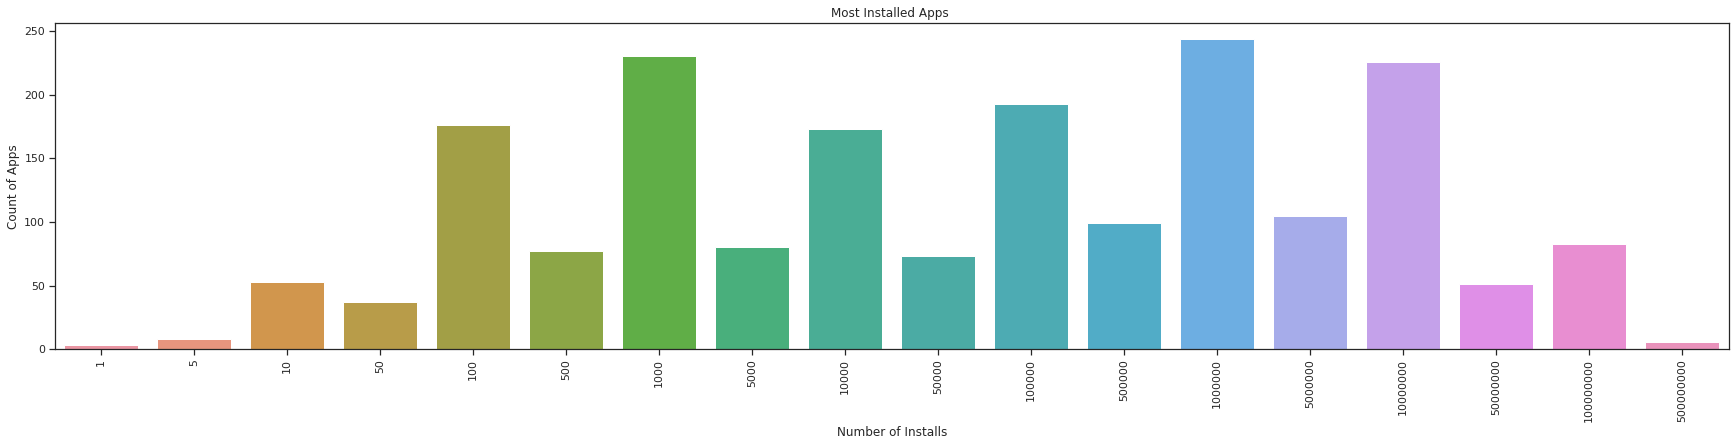

In [ ]:
g = sns.countplot(high_rating_app['Installs'].sort_index(ascending = False))
plt.xticks(rotation = 90)
plt.title("Most Installed Apps ")
plt.ylabel("Count of Apps")
plt.xlabel("Number of Installs")
sns.set(rc = {'figure.figsize':(15,10)})
plt.show()

#Observation 
We can see that there are some apps which has 50crore(500 Millions) of downloads and most of the apps has 1 Millions and 10 Millions of downloads also some apps between 0-100 has 100 Millions of downloads.

#9.Now lets us look for the Low Rated Apps

In [ ]:
# Printing only 'low' rating_group.
low_rating_app = df1[df1['Rating_Group'] == 'low']
low_rating_app.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating_Group
518,Just She - Top Lesbian Dating,DATING,1.9,953,19M,100000,Free,0.0,Mature 17+,Dating,low
520,EliteSingles – Dating for Single Professionals,DATING,2.5,5377,19M,500000,Free,0.0,Mature 17+,Dating,low
527,Sugar Daddy Dating App,DATING,2.5,277,5.7M,100000,Free,0.0,Mature 17+,Dating,low
549,EliteSingles – Dating for Single Professionals,DATING,2.5,5377,19M,500000,Free,0.0,Mature 17+,Dating,low
554,Just She - Top Lesbian Dating,DATING,1.9,953,19M,100000,Free,0.0,Mature 17+,Dating,low


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


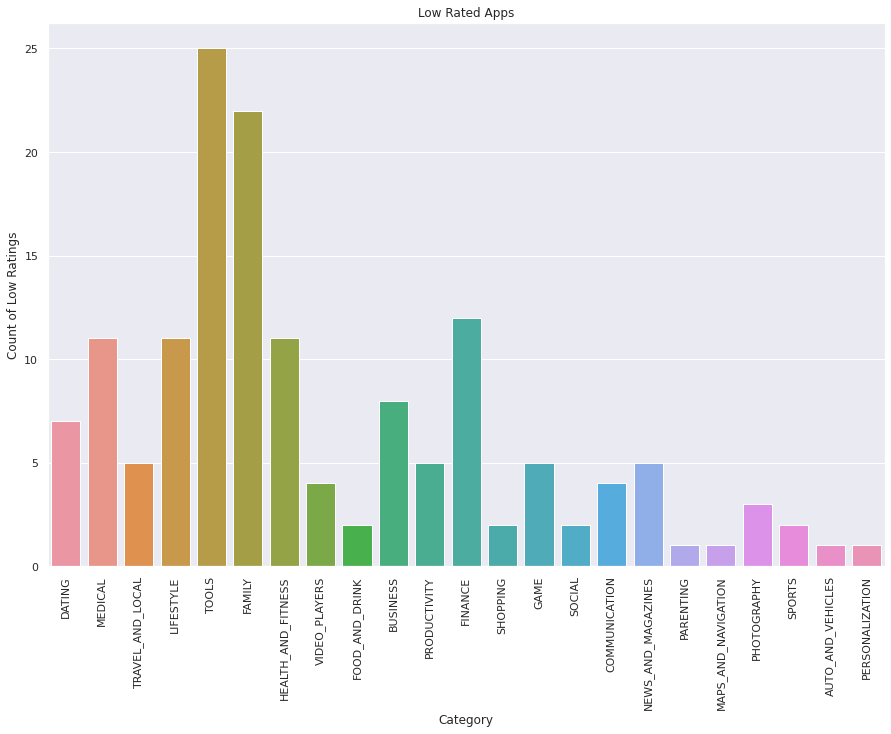

In [ ]:
g = sns.countplot(low_rating_app['Category'])
plt.xticks(rotation = 90)
plt.title("Low Rated Apps")
plt.xlabel("Category")
plt.ylabel("Count of Low Ratings")
sns.set(rc = {'figure.figsize':(15,10)})
plt.show()

#Observation:
* Apps under Tool and Family Category has the highest number of low rating whereas apps under Sports, Social, Maps_and_Navigation, Auto_and_Vehicles, Shopping and Parenting has least number of low rating.

#10.Now let us see the Age restricted apps.

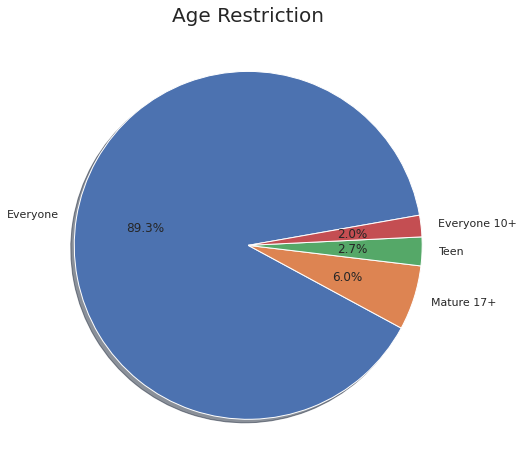

In [ ]:
plt.figure(figsize=(8,8))
rating_name =low_rating_app['Content Rating'].value_counts(sort = True).index
rating_count = low_rating_app['Content Rating'].value_counts(sort = True).tolist()
plt.pie(rating_count, labels=rating_name,autopct='%1.1f%%', shadow=True, startangle=370,)
plt.title('Age Restriction',size = 20)
plt.show()

#Observation:
* We can see 89% of apps is available for all the users of any ages.
* 2% of apps are been restricted for users under age of 10.
* 2.7% of apps are meant only for the Teenagers.
* 6.0% of apps are restricted for users below age 17.

#11.Correlation of Values

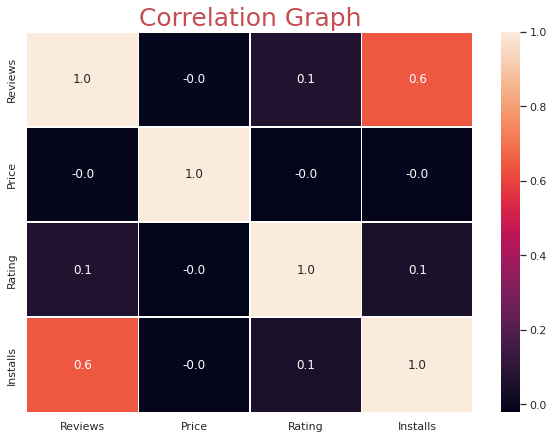

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df1[["Reviews","Price","Rating","Installs"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.title("Correlation Graph",c="r",size=25)
plt.show()

#Observation
* We can see the Price is Negatively correllated with Rating, Installs and Reviews.
* There is strong Positive correlation between Reviews and Installs.
* The Rating is slightly Positive correlated with Installs and Reviews.
* The Installs is slightly Positive correlated with Rating and Negative correlation with Price.

#12.Average Price of all Category

Text(0.5, 1.0, 'Avg Price of all Categories')

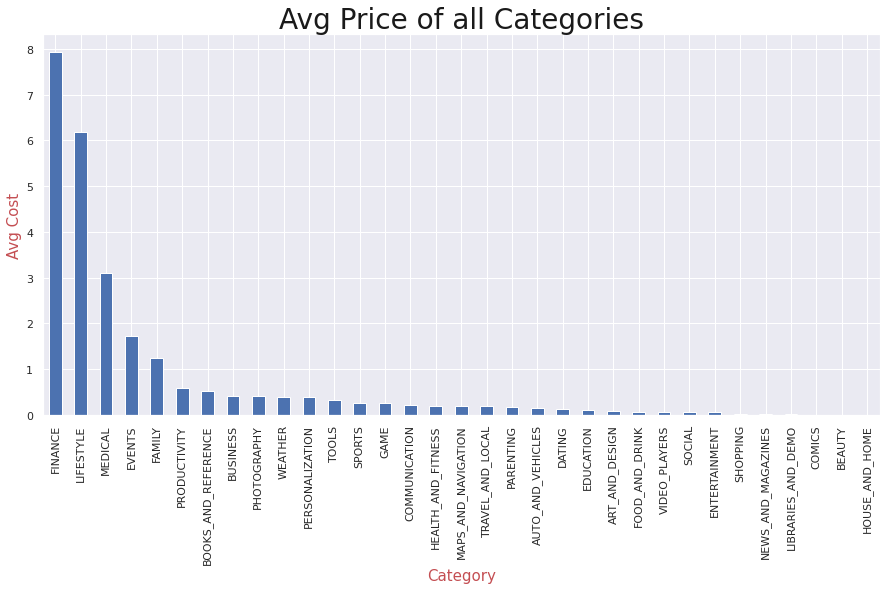

In [ ]:
plt.figure(figsize=(15,7))
df1.groupby("Category")['Price'].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Category",size=15,c="r")
plt.ylabel("Avg Cost",size=15,c="r")
plt.title("Avg Price of all Categories",size=28,c="k")

#Observation
* Fron the above graph we can see that apps which are related to Finance, Lifestyle and Medical has highest avg cost when compared to others, However Finance Category has the highest avg cost when compared with all the Category.

#13.Let us see Percentage of app which are Free and Paid

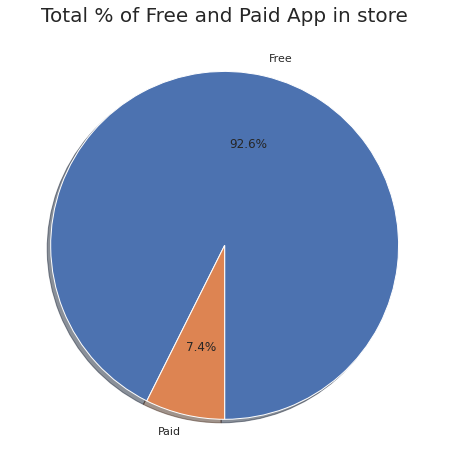

In [ ]:
plt.figure(figsize=(8,8))
labels =df1['Type'].value_counts(sort = True).index
sizes = df1['Type'].value_counts(sort = True)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total % of Free and Paid App in store',size = 20)
plt.show()

#Observation 
* We can see that out of 100% 92% of apps are Free and about 7% of apps are Paid.

#Conclusion.
(1) There are some of the aspects that the Developers should research before proceeding with the app development, By conducting a simple Exploratory Data Analysis (EDA) on the Play Store Dataset we not only eliminate avoidable risk of failure but we may also be able to provide better ideas for building the app.

(2) Most of the users have Positive sentiment of about 64% and 22% of negative sentiment and 14%of neutral sentiment.

(3) Out of 11000 Apps, 80% of apps are free and 20% are paid.

(4) Category like 'FAMILY', 'GAMES' has maximum reviews from the users.

(5) Top five apps of 'FAMILY' Category are:
* Super ABC! Learning games for kids! Preschool
* Candy Pop Story
* Dog Run - Pet Dog Simulator
* Puzzle Kids - Animals Shapes and Jigsaw Puzzles
* No. Color - Color by Number, Number Coloring 

(6) From the above Apps we can see that Apps which are focused on Childrens have highest rating.

(7) Apps under Tool and Family Category has the highest number of low rating whereas apps under Sports, Social, Maps_and_Navigation, Auto_and_Vehicles, Shopping and Parenting has least number of low rating.

(8) We got to see that there are some apps which has 50crore(500 millions) of downloads and most of the apps has 1 Millions and 10 Millions of downloads also some apps between 0-100 has 100 Millions of downloads.

(9) We could see that the sentiment of the users for Free apps is slightly less when compared to the Paid apps.

(10) We found that there are 7299 of average rating, 1917 of high rating and 150 of low rating.

(11) From the Age Restricted Pie Graph we could see:
*  89% of apps is available for all the users of any ages.
* 2% of apps are been restricted for users under age of 10.
* 2.7% of apps are meant only for the Teenagers.
* 6.0% of apps are restricted for users below age 17.

(12) We can see that apps which are related to Finance, Lifestyle and Medical has highest avg cost when compared to others, However Finance Category has the highest avg cost when compared with all the Category.

(13) From the HeatMap we can observe that:  
** We can see the Price is Negatively correllated with Rating, Installs and Reviews.
* There is strong Positive correlation between Reviews and Installs.
* The Rating is slightly Positive correlated with Installs and Reviews.
* The Installs is slightly Positive correlated with Rating and Negative correlation with Price.

(14) We can see that out of 100%, 92% of apps are Free and about 7% of apps are Paid.

(15) The Developers can focus on the kids related apps in order to get good reviews, rating and more number of installs.


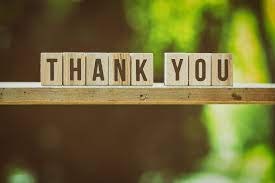